In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
radius = 1.0 
n_discs = 20

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center

(-8.85816947400193, 9.21285918751608)

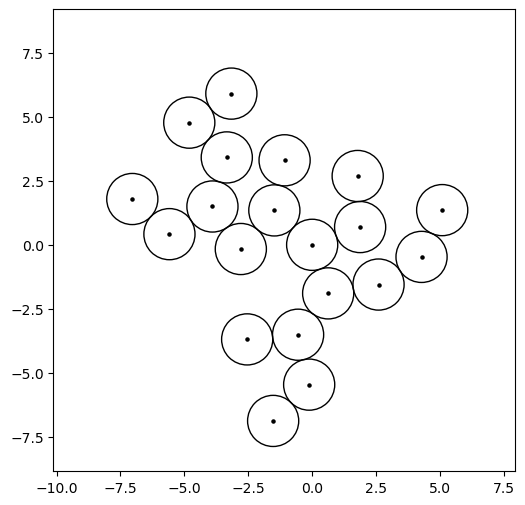

In [42]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])

In [43]:
from scipy.spatial import Voronoi, voronoi_plot_2d

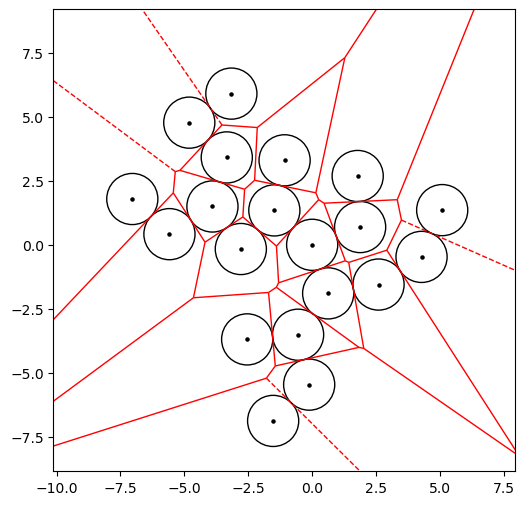

In [98]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

In [ ]:
from scipy.spatial.distance import euclidean

In [225]:
new_point = (0.9, 0.0)

In [226]:
threshold=1000
closest_point = None

for ii in range(vor.npoints):
    dd = euclidean(new_point, vor.points[ii])
    if threshold>dd:
        threshold=dd
        closest_point = ii

In [227]:
neighbors = []

region = vor.point_region[closest_point]
vertices = vor.regions[region].copy()
if -1 in vertices:
    vertices.remove(-1)

aux_dict = {jj:ii for ii,jj in enumerate(vor.point_region)}

for ii in range(len(vor.regions)):
    if len(np.intersect1d(vertices, vor.regions[ii])):
        if ii!= region:
            neighbors.append(aux_dict[ii])

In [228]:
neighbors

[5, 2, 7, 6, 1]

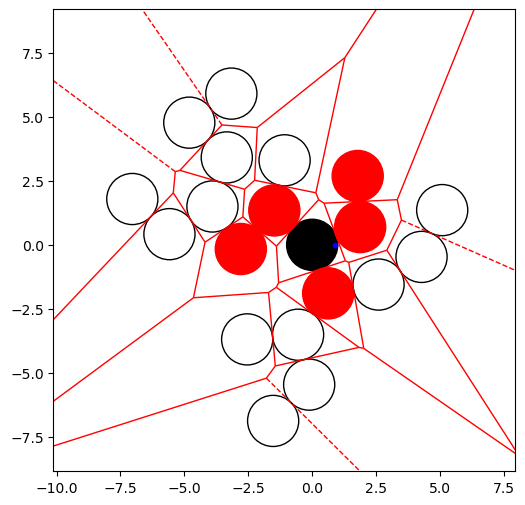

In [229]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    if ii==closest_point:
        ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=True))
    elif ii in neighbors:
        ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='r', fill=True))
    else:
        ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(new_point[0], new_point[1], s=10, c='b')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

In [230]:
neighbors

[5, 2, 7, 6, 1]

In [231]:
closest_point

0

In [232]:
influencers = [closest_point] + neighbors

In [236]:
factors = []

for ii in influencers:
    factors.append(1.0/euclidean(new_point, vor.points[ii]))

In [237]:
factors

[1.1111111111111112,
 0.3530864437096594,
 0.8351505227530931,
 0.270704159775349,
 0.3658084907943664,
 0.5210600378904361]

In [238]:
factors/np.linalg.norm(factors)

array([0.69781704, 0.22175076, 0.52450404, 0.17001178, 0.22974066,
       0.32724412])